In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from answers import distributions
from common import make_pmf, make_cdf, percentile, percentile_rank, load_forest_fires

plt.style.use('ggplot')

# Distributions

Chapter 2-4, 6 of [Think Stats 2nd Edition](https://greenteapress.com/wp/think-stats-2e/).

## Two dimensional tensors

In this notebook we will be working with tensors of at two dimensions `(batch_size, num_features)`

- this is to get you used to having multiple samples in a single array 
- when training neural networks your `x_train`, `y_train` will have at leat two dimensions

## What is a distribution?

A distribution is
- a set of values (continuous or discrete)
- probabilities of those values (between 0 and 1)

Let's sample data from **two normal** distributions and **two uniform** distributions (four in total):

In [2]:
normal = np.random.normal((10, 10), (10, 20), size=(1000, 2)).astype(int)
uniform = np.random.uniform(low=-50, high=50, size=(1000, 2)).astype(int)

In [3]:
normal.shape

(1000, 2)

## What is a statistic?

Infomation about a distribution

Scalars

## Central tendency

The **mean** - also known as the **expected value** (expectation == on average)

In [4]:
np.mean(normal, axis=0)

array([9.904, 9.849])

The **median** is a percentile based statistic (50th percentile) informative when you have outliers

In [5]:
np.median(normal, axis=0)

array([9., 9.])

The difference between the mean & median can characterize data skew:

In [6]:
np.mean(normal, axis=0) - np.median(normal, axis=0)

array([0.904, 0.849])

## Spread / variability of the data

**Variance** 
- how far away a variable is from its mean

$$ \sigma^2_x = \frac{1}{n} \sum(x_n - \mu_x)^2 $$

In [7]:
np.var(uniform, axis=0)

array([822.405004, 798.293671])

**Standard deviation** 
- square root of the variance (in the same units as the data):

$$ \sigma = \sqrt{\sigma^2_x}$$

In [8]:
#  test that var^2 == standard deviation
assert (np.sqrt(np.var(uniform, axis=0)) == np.std(uniform, axis=0)).all()

np.std(uniform, axis=0)

array([28.67760457, 28.25409123])

## Histogram

We can use a **histogram** to show shape & outliers
- the histogram performs binning on our continuous variables

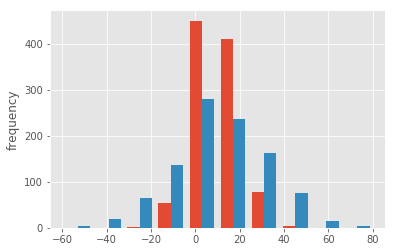

In [9]:
f = plt.hist(normal)
f = plt.ylabel('frequency')

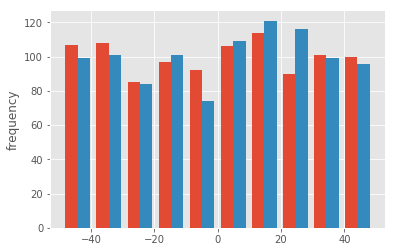

In [10]:
f = plt.hist(uniform)
_ = plt.ylabel('frequency')

Histograms can also compare distributions (note that we have four!):
- but if our variables have different ranges, it can be hard to compare

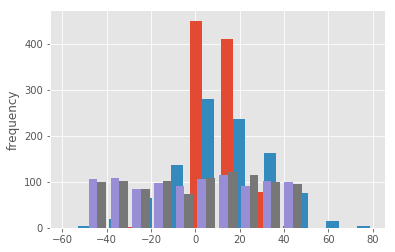

In [11]:
f = plt.hist(normal)
f = plt.hist(uniform)
_ = plt.ylabel('frequency')

## Probability mass functions (PMF)

The PMF **normalizes of the counts** of discrete bins:
- this makes the y-axis comparable 
- look at `make_pmf` definition in `common.py`

Problems with PMFs:
- the more values we have, the smaller their probabilities become (and the larger the effect of noise on the probabilites)
- even with the correct scale, it is still hard to compare distributions

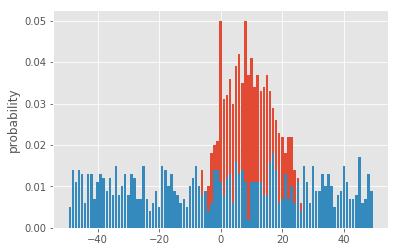

In [12]:
plt.bar(*make_pmf(normal[:, 0]))
plt.bar(*make_pmf(uniform[:, 0]))
_ = plt.ylabel('probability')

## Percentile rank

Value & samples -> **percentile rank**

90th percentile = a value that is higher than 90% of the group

In [13]:
values = np.array([55, 77, 88, 66, 99])
value = 66

percentile_rank(value, values)

0.4

## Cumulative distribution functions (CDF)

The CDF is a function that maps from **value -> normalized percentile rank** (in the range of 0 to 1):

In [14]:
cdf = [(percentile_rank(v, values), v) for v in values]

In [15]:
cdf

[(0.2, 55), (0.6, 77), (0.8, 88), (0.4, 66), (1.0, 99)]

We can then evaluate the CDF for any value of x using our percentile rank function:

In [16]:
percentile_rank(0, normal[:, 0])

0.175

Lets plot a CDF for two of our distributions.  We can see:
- the range (min & max)
- the median

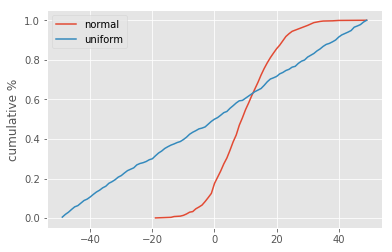

In [17]:
y, x = zip(*make_cdf(normal[:, 0]))
plt.plot(x, y, label='normal')

y, x = zip(*make_cdf(uniform[:, 0]))
plt.plot(x, y, label='uniform')
plt.ylabel('cumulative %')

_ = plt.legend()

## Quantiles

Above we have mapped from 
- value & samples -> percentile rank

Let's now do the opposite 
- **percentile rank & samples -> value**

One example of a percentile based statistic is the median (measuring the central tendency of the distribution):

In [18]:
percentile(0.5, normal[:, 0])

9

Also useful are other percentile based statistics such as the **interquartile range (IQR)**, which is the difference between the 75th and 25th percentiles:

In [19]:
percentile(0.75, normal[:, 0]) - percentile(0.25, normal[:, 0])

13

Also common are **quantiles** - equally spaced points in the distribution:

In [20]:
print(percentile(0.25, normal[:, 0]), percentile(0.5, normal[:, 0]), percentile(0.75, normal[:, 0]))

3 9 16


## Sampling from CDFs

Because the distribution of percentile ranks is uniform, we can eaisly sample from a CDF:

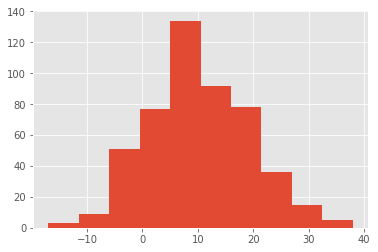

In [21]:
f = plt.hist(
    [percentile(s, normal[:, 0]) for s in np.random.uniform(0, 1, 500)]
)

## Comparing percentile ranks

We can compare values between distributions
- compare using percentile rank

In [22]:
value = 10

rank = percentile_rank(value, normal[:, 0])
rank

0.548

The value in our second normal of the same percentile rank

In [23]:
percentile(rank, normal[:, 1])

13

## Practical

For the variable  `temp`

- plot a histogram
- plot a probability mass function
- calculate four quantiles
- compare with `wind` by comparing the percentile rank for `temp = 10`

In [24]:
raw = load_forest_fires()

raw.head()


data.shape = (517, 13)
columns ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


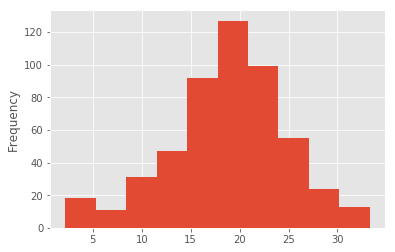

In [25]:
raw.loc[:, 'temp'].plot(kind='hist')

In [29]:
value = 10

rank = percentile_rank(value, raw.loc[:, 'temp'])
percentile(rank, raw.loc[:, 'wind'])

1.8

In [27]:
## answers
distributions??

## Quiz

How can we characterize skew using the mean and median?

What is variance?

What does a histogram show?

How does a probability mass function relate to a histogram?

How does a cumulative distribution function relate to a percentile?

What are quantiles?

How do percentile ranks allow us to compare two different distributions?